In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os Dados

In [2]:
from sklearn.datasets import load_iris

data = load_iris()

In [3]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
features = data['data']

In [5]:
target = data['target']

In [6]:
feature_names = data['feature_names']
features = pd.DataFrame(features, columns=feature_names)

In [7]:
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
target = pd.DataFrame(target, columns=['target'])

In [9]:
target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [10]:
df = pd.concat([features, target], axis=1)

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [13]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
df['target_real_names'] = np.where(df['target'] == 0, 'setosa', 
                                   np.where(df['target'] == 1, 'versicolor', 'virginica'))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_real_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [15]:
df['target_real_names'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: target_real_names, dtype: int64

# Treinando Modelos

In [16]:
X = df.drop(['target', 'target_real_names'], axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y = df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## Árvore de Decisão

In [18]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
df.loc[[1, 55, 102]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_real_names
1,4.9,3.0,1.4,0.2,0,setosa
55,5.7,2.8,4.5,1.3,1,versicolor
102,7.1,3.0,5.9,2.1,2,virginica


In [20]:
# prevendo labels
new_X = df.loc[[1, 55, 102]].drop(['target', 'target_real_names'], axis=1)
tree_model.predict(new_X)

array([0, 1, 2])

In [21]:
# prevendo probabilidades
tree_model.predict_proba(new_X)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [22]:
iris_misteriosa = np.array([2.3, 3.5, 1.1, 0.312]).reshape(-1, 4)
tree_model.predict(iris_misteriosa)

array([0])

In [23]:
tree_model.predict_proba(iris_misteriosa)

array([[1., 0., 0.]])

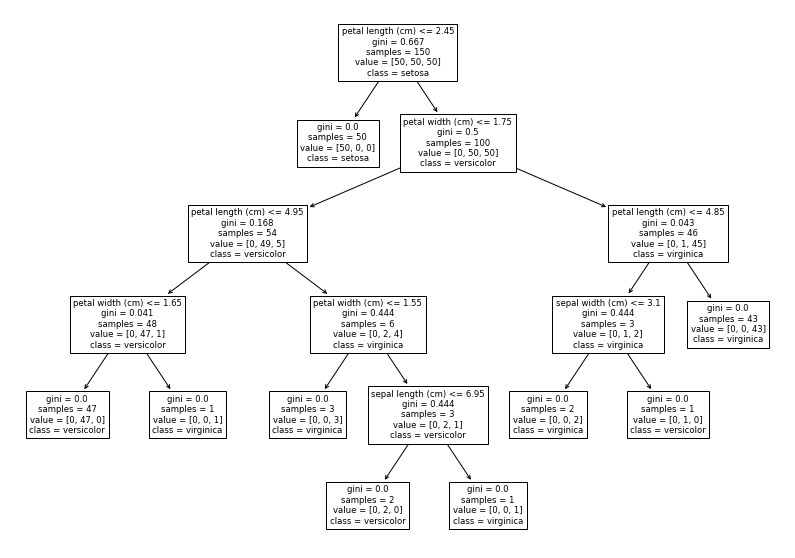

In [24]:
# Plus: plotando a árvore
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(14, 10))

plot_tree(tree_model, feature_names=X.columns.to_list(), class_names=['setosa', 'versicolor', 'virginica']);

## Regressão Logística

In [25]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
logreg_model.predict(new_X)

array([0, 1, 2])

In [27]:
logreg_model.predict_proba(new_X)

array([[9.71339457e-01, 2.86605127e-02, 3.01872659e-08],
       [6.99007005e-03, 8.60114691e-01, 1.32895239e-01],
       [2.48426915e-06, 2.55695243e-02, 9.74427991e-01]])

In [28]:
logreg_model.predict(iris_misteriosa)

array([0])

In [29]:
logreg_model.predict_proba(iris_misteriosa)

array([[9.99347781e-01, 6.52216987e-04, 1.81171279e-09]])

## Avaliando os modelos

Iremos avaliar os modelos usando a acurácia

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
y_pred_tree = tree_model.predict(X)

In [32]:
accuracy_score(y, y_pred_tree)

1.0

In [33]:
y_pred_logreg = logreg_model.predict(X)

In [34]:
accuracy_score(y, y_pred_logreg)

0.9733333333333334

A árvore de decisão apresentou uma melhor acurácia nos dados de treino.